## Observations and Insights 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [142]:
#Total Entries 
len(study_data_complete)

1893

In [143]:
# Checking the number of mice in the DataFrame.

miceCount = study_data_complete['Mouse ID'].nunique()
miceCount

249

In [144]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Check to see how many were dropped.

study_clean = study_data_complete.drop_duplicates(['Mouse ID', 'Timepoint'])
len(study_clean)

1888

In [145]:
# Optional: Get all the data for the duplicate mouse ID. 


## Summary Statistics

In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = df_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = df_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = df_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = df_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = df_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_table = pd.DataFrame({"Mean Tumor Volume": average, "Median Tumor Volume": median, "Variance Tumor Volume": var, 
                           "Standard Dev Tumor Volume": std, "Standard Error Tumor Volume": sem})
drug_table
# This method produces everything in a single groupby function.
drug_table = study_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
drug_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

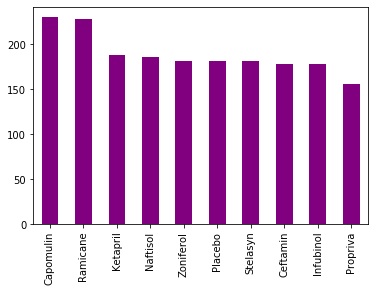

In [148]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

study_clean['Drug Regimen'].value_counts().plot(kind ='bar', color='purple',)



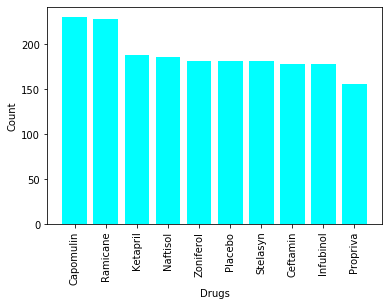

In [149]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
counts = study_clean["Drug Regimen"].value_counts()
drugs = counts.index.values
plt.xticks(rotation=90)
plt.xlabel("Drugs")
plt.ylabel("Count")
plt.bar(drugs, counts, color='cyan')
plt.show()



## Pie Plots

In [150]:
sex_labels = study_clean.Sex.unique()

sex_values = study_clean.Sex.value_counts()


In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


Text(0.5, 1.0, 'Female Mice v. Male Mice ')

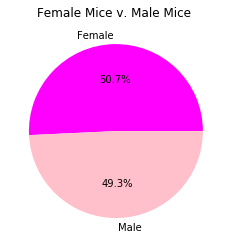

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_values, labels = sex_labels, autopct= '%1.1f%%', 
        colors= ['magenta','pink'])
plt.title('Female Mice v. Male Mice ')

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Need to find maximum timepoint by groupingby Mouse ID then reset index
id_timepoint = pd.DataFrame(study_clean.groupby("Mouse ID").max()['Timepoint']).reset_index()

# Left join the merged df for tumor volume
max_tumor_vol = pd.merge(id_timepoint, study_clean[['Mouse ID','Tumor Volume (mm3)', 'Drug Regimen', 'Timepoint']], on = ['Mouse ID','Timepoint'], how = 'left')

# Need to find IQR (Q1,Q3), upper and lower bound


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

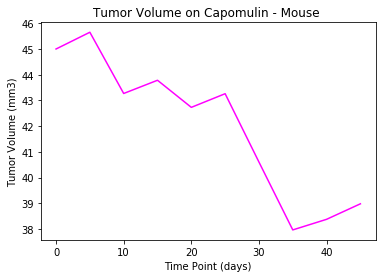

In [154]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_point = study_clean.loc[study_clean['Mouse ID'] == 
                     ''][['Timepoint','Tumor Volume (mm3)']]


plt.plot(tumor_time.Timepoint,tumor_time['Tumor Volume (mm3)'], color = 'magenta')
plt.title("Tumor Volume on Capomulin - Mouse ")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


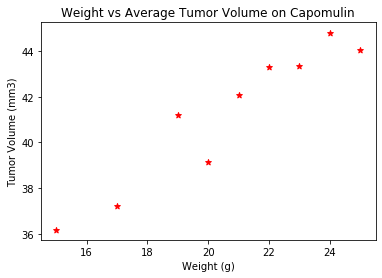

In [155]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

tumor_values = study_clean.loc[study_clean['Drug Regimen'] == 'Capomulin'].groupby("Weight (g)").mean()['Tumor Volume (mm3)']

plt.scatter(tumor_values.index, tumor_values.values, color = 'red', marker="*")
plt.title("Weight vs Average Tumor Volume on Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation coefficient is 0.951, which indicates a very strong correlation between the Weight and Tumor Volume


Text(0, 0.5, 'Tumor Volume (mm3)')

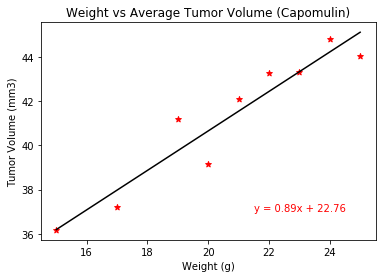

In [156]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

regression = linregress(tumor_values.index, tumor_values.values)


corr = round(regression.rvalue,3)
print(f'The correlation coefficient is {corr}, which indicates a very strong correlation between the '
      'Weight and Tumor Volume')

# Regression model 
regression_vals = tumor_values.index * regression.slope + regression.intercept

# Regression Eq
regression_eq = "y = " + str(round(regression.slope,2)) + "x + " + str(round(regression.intercept,2))

#Re-plot the scatter plot from previous cell. Add the regression line and eq to it.
plt.scatter(tumor_values.index, tumor_values.values, color = 'red', marker="*")
plt.plot(tumor_values.index, regression_vals, color = 'black')
plt.annotate(regression_eq, (21.5,37), fontsize=10 , color= 'red')
plt.title("Weight vs Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")